In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torchvision import datasets, transforms
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from dataset import train_loader, test_loader
from model import Net_gn
from utils import train, test, train_losses, test_losses, train_acc, test_acc
from wrong_classified import get_incorrect_preds, plot_incorrect_preds

/home/sn/anaconda3/envs/fastai2022/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Files already downloaded and verified
(1600000, 32, 3)
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Files already downloaded and verified
Files already downloaded and verified
cuda available? True


In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_gn().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
         GroupNorm-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 34, 34]             512
             ReLU-10           [-1, 16, 34, 34]               0
        GroupNorm-11           [-1, 16, 34, 34]              32
          Dropout-12           [-1, 16, 34, 34]               0
        MaxPool2d-13           [-1, 16, 17, 17]               0
           Conv2d-14           [-1

In [4]:
EPOCHS = 20
model =  Net_gn().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=EPOCHS, steps_per_epoch=len(train_loader))
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, scheduler, epoch)
    test(model, device, test_loader)

EPOCH: 1


Loss=1.7974822521209717 Batch_id=390 Accuracy=20.75: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 1.8753, Accuracy: 2658/10000 (26.58%)

EPOCH: 2


Loss=1.6073338985443115 Batch_id=390 Accuracy=35.05: 100%|█| 391/391 [00:13<00:0



Test set: Average loss: 1.5200, Accuracy: 4396/10000 (43.96%)

EPOCH: 3


Loss=1.384556531906128 Batch_id=390 Accuracy=47.31: 100%|█| 391/391 [00:12<00:00



Test set: Average loss: 1.2799, Accuracy: 5387/10000 (53.87%)

EPOCH: 4


Loss=1.438228964805603 Batch_id=390 Accuracy=54.98: 100%|█| 391/391 [00:12<00:00



Test set: Average loss: 1.1859, Accuracy: 5692/10000 (56.92%)

EPOCH: 5


Loss=1.1011059284210205 Batch_id=390 Accuracy=59.28: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 1.0169, Accuracy: 6366/10000 (63.66%)

EPOCH: 6


Loss=1.1325409412384033 Batch_id=390 Accuracy=62.93: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.9761, Accuracy: 6488/10000 (64.88%)

EPOCH: 7


Loss=0.7246526479721069 Batch_id=390 Accuracy=65.15: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.9557, Accuracy: 6577/10000 (65.77%)

EPOCH: 8


Loss=1.0103195905685425 Batch_id=390 Accuracy=67.01: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.9039, Accuracy: 6779/10000 (67.79%)

EPOCH: 9


Loss=0.8519287109375 Batch_id=390 Accuracy=68.41: 100%|█| 391/391 [00:12<00:00, 



Test set: Average loss: 0.9092, Accuracy: 6768/10000 (67.68%)

EPOCH: 10


Loss=0.6663936972618103 Batch_id=390 Accuracy=69.41: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.8287, Accuracy: 7100/10000 (71.00%)

EPOCH: 11


Loss=0.8629411458969116 Batch_id=390 Accuracy=70.89: 100%|█| 391/391 [00:13<00:0



Test set: Average loss: 0.8413, Accuracy: 7073/10000 (70.73%)

EPOCH: 12


Loss=1.0684655904769897 Batch_id=390 Accuracy=72.35: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7692, Accuracy: 7267/10000 (72.67%)

EPOCH: 13


Loss=0.9074104428291321 Batch_id=390 Accuracy=73.01: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7347, Accuracy: 7409/10000 (74.09%)

EPOCH: 14


Loss=0.7144076824188232 Batch_id=390 Accuracy=74.17: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7489, Accuracy: 7403/10000 (74.03%)

EPOCH: 15


Loss=0.6565725803375244 Batch_id=390 Accuracy=75.01: 100%|█| 391/391 [00:12<00:0



Test set: Average loss: 0.7287, Accuracy: 7440/10000 (74.40%)

EPOCH: 16


Loss=0.7239452004432678 Batch_id=390 Accuracy=76.27: 100%|█| 391/391 [00:13<00:0



Test set: Average loss: 0.6867, Accuracy: 7561/10000 (75.61%)

EPOCH: 17


Loss=0.5775789618492126 Batch_id=390 Accuracy=77.20: 100%|█| 391/391 [00:10<00:0



Test set: Average loss: 0.7005, Accuracy: 7595/10000 (75.95%)

EPOCH: 18


Loss=0.4339466989040375 Batch_id=390 Accuracy=78.00: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.6649, Accuracy: 7708/10000 (77.08%)

EPOCH: 19


Loss=0.6194774508476257 Batch_id=390 Accuracy=78.82: 100%|█| 391/391 [00:07<00:0



Test set: Average loss: 0.6613, Accuracy: 7706/10000 (77.06%)

EPOCH: 20


Loss=0.44381237030029297 Batch_id=390 Accuracy=78.84: 100%|█| 391/391 [00:07<00:



Test set: Average loss: 0.6603, Accuracy: 7700/10000 (77.00%)



Text(0.5, 1.0, 'Test Accuracy')

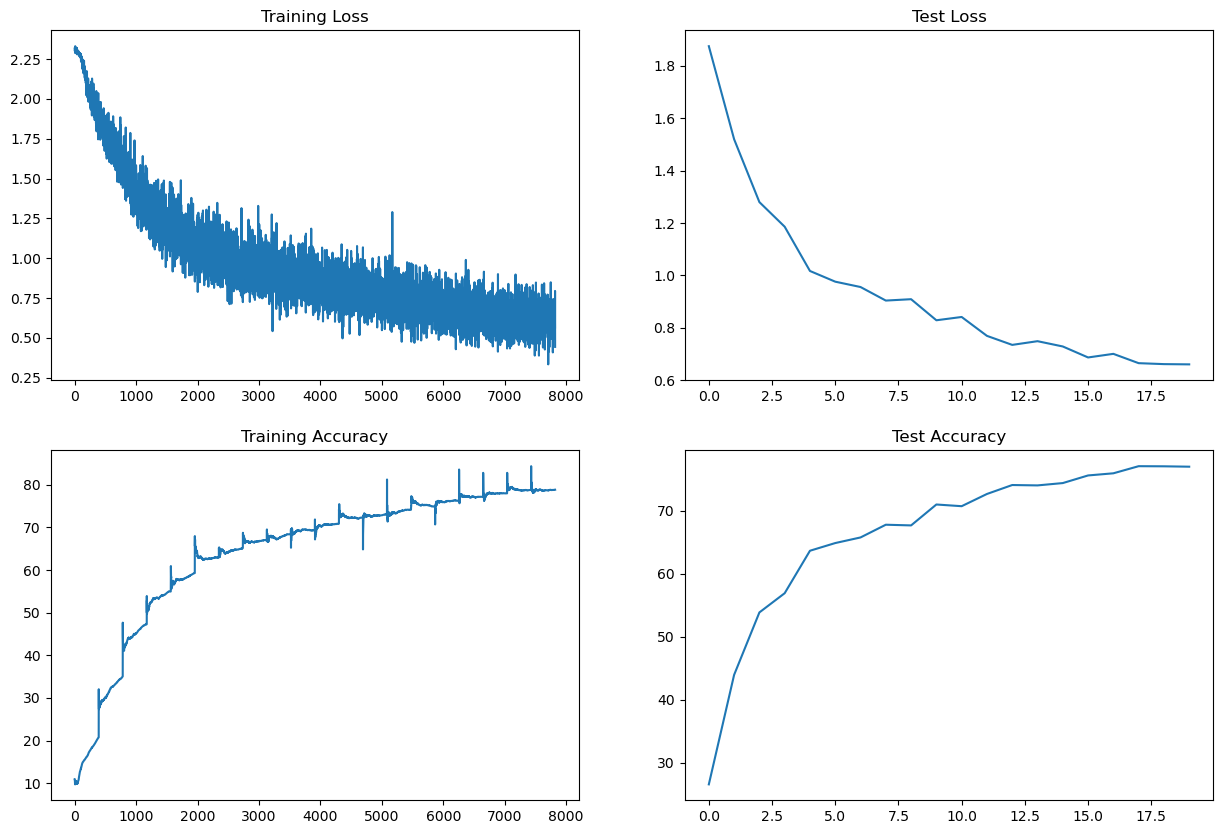

In [5]:
t = [t_items.item() for t_items in train_losses]
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

Classes in order Actual and Predicted


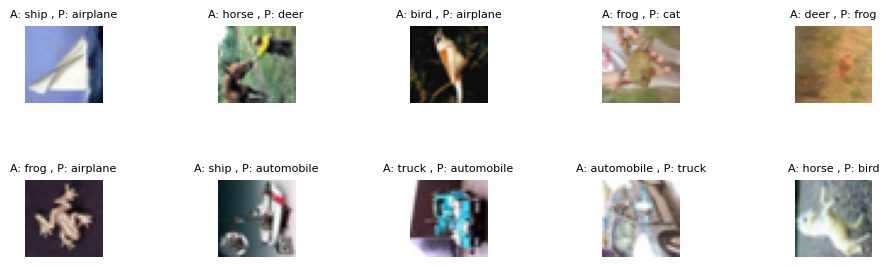

In [6]:
true_wrong, incorrect_examples, pred_wrong = get_incorrect_preds(model, test_loader)
plot_incorrect_preds(true_wrong, incorrect_examples, pred_wrong)